<h1 align="center">YRoots</h1>

YRoots is a numerical rootfinding package which can be used to solve multivariate systems of nonlinear equations. While other rootfinding packages exist, YRoots is unique in that it finds all the roots in a compact interval.

Download YRoots from github to begin using the package.

  ```git
      git clone https://github.com/tylerjarvis/RootFinding/tree/master   
  ```
  
We demonstrate here how to use YRoots.

In [43]:
#Imports
#TODO MAKE THE IMPORT NAME NICER-- goal: import yroots as yr
#YRoots Solver
from yroots import subdivision as yr

#plotting tools
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import broyden1, root

#autoreload
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Multivariate Functions

To find the commmon zeros of a set of multivariate functions, input a list of functions and a search interval. The syntax for this is:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ **vectorized** functions in $n$ variables and `a` and `b` are array-like objects of upper and lower bounds (respectively) of the search domain in each dimension. For univariate and bivariate systems, the optional parameter `plot` allows the user to graph the zero-loci and roots of the functions.

YRoots returns an numpy array where each row is a root.

### Two variables
Here is an example of YRoots solving the relatively simple bivariate system of equations

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the systems subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6$$ on the search domain $[-1,0]\times[-2,1]$.

<Figure size 7200x4800 with 0 Axes>

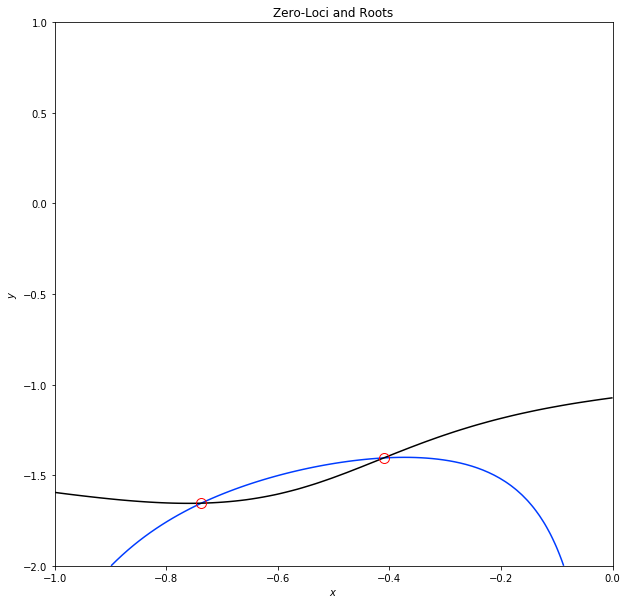

CPU times: user 785 ms, sys: 71.8 ms, total: 857 ms
Wall time: 489 ms


(2, array([[-0.41003227, -1.40471665],
        [-0.73720253, -1.65461644]]))

In [70]:
#define the functions and the search domain
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6
h = lambda x,y : (x-0.41003227)*(y-0.73720253)
a = np.array([-1,-2]) #lower bounds on x and y
b = np.array([0,1]) #upper bounds on x and y

#solve and time
%time roots = yr.solve([f,g], a, b, plot=True)

#report the number and location of the roots.
roots.shape[0],roots

This system is solved in under a second and finds all the roots in the region.

Here is a more complicated bivariate system with many more roots. It runs in under two minutes on the region $[-5,5]\times[-5,5]$.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

Notice that YRoots correctly avoids points that are nearly roots but are not roots.

Interval -  [4.90295008 4.9688407 ] [4.93589539 5.        ]
Interval -  [3.85159412 4.8003374 ] [3.93170889 4.86811639]
Interval -  [4.0832522 4.4417948] [4.15491619 4.51756646]
Interval -  [3.93170889 4.37401581] [4.00748055 4.4417948 ]
Interval -  [4.30235183 3.1139578 ] [4.4417948  3.26139344]
Interval -  [4.15491619 3.18972946] [4.23068784 3.26139344]
Interval -  [3.56471551 4.93589539] [3.64048716 5.        ]
Interval -  [3.56471551 4.4417948 ] [3.85159412 4.72867342]
Interval -  [3.34150821 4.72867342] [3.41727987 4.8003374 ]
Interval -  [3.64048716 4.37401581] [3.71215115 4.4417948 ]
Interval -  [3.03818615 4.8003374 ] [3.1139578  4.86811639]
Interval -  [3.03818615 4.23068784] [3.1139578  4.30235183]
Interval -  [3.64048716 3.49305152] [3.71215115 3.56471551]
Interval -  [3.41727987 2.95807137] [3.49305152 3.03818615]
Interval -  [2.95807137 3.78381513] [3.03818615 3.85159412]
Interval -  [4.8003374  1.42313256] [4.86811639 1.5078394 ]
Interval -  [4.48073616 1.42313256] [4.517

Interval -  [-2.26919344  4.93589539] [-2.18448661  5.        ]
Interval -  [-2.35875554  4.51756646] [-2.26919344  4.58923044]
Interval -  [-2.01966501  4.15491619] [-1.8548434   4.30235183]
Interval -  [-1.69895698  3.56471551] [-1.37824894  3.85159412]
Interval -  [-1.29813417  3.18972946] [-1.22236252  3.26139344]
Interval -  [-1.53413537  2.95807137] [-1.37824894  3.1139578 ]
Interval -  [-1.69895698  3.1139578 ] [-1.61425014  3.18972946]
Interval -  [-0.45089678  2.56958435] [-0.37078201  2.63736334]
Interval -  [-0.45089678  1.7438406 ] [-0.37078201  1.82395537]
Interval -  [-0.75421885  2.35048473] [-0.59833242  2.49792037]
Interval -  [-1.07492688  2.56958435] [-0.99022005  2.63736334]
Interval -  [-1.07492688  1.82395537] [-0.99022005  1.89972702]
Interval -  [-0.29501035  0.64321604] [-0.2192387   0.72333081]
Interval -  [-1.07492688  1.19992527] [-0.99022005  1.27569693]
Interval -  [-1.07492688  0.228866  ] [-0.99022005  0.31357283]
Interval -  [-1.57307673  2.38942608] [-

<Figure size 7200x4800 with 0 Axes>

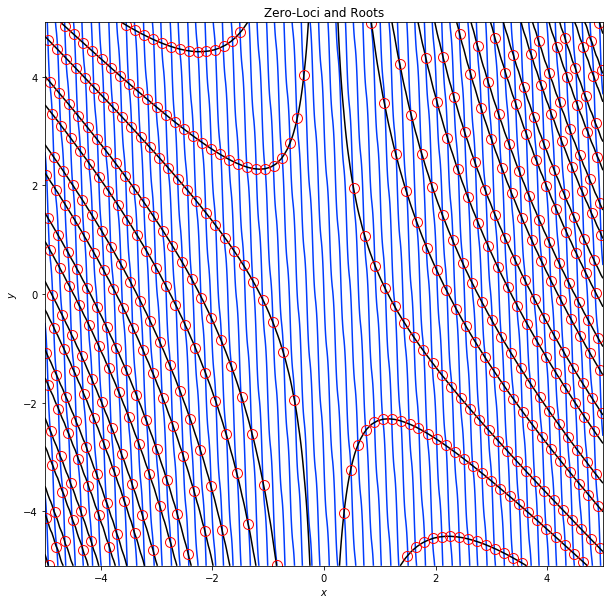

CPU times: user 2min 18s, sys: 12.4 s, total: 2min 30s
Wall time: 1min 29s


(452, array([[ 4.93436103,  4.98533589],
        [ 4.79373961,  4.65617128],
        [ 4.64202745,  4.54882427],
        [ 4.97744254,  4.12370109],
        [ 4.82579507,  4.01506556],
        [ 4.50452611,  4.15725466],
        [ 4.3196703 ,  4.71278193],
        [ 4.17059957,  4.55260679],
        [ 3.85173029,  4.64679907],
        [ 4.35542979,  3.99759213],
        [ 4.03767653,  4.06947196],
        [ 4.68768562,  3.63565998],
        [ 4.5385112 ,  3.4775538 ],
        [ 4.86937854,  3.1433951 ],
        [ 4.72008839,  2.9876055 ],
        [ 4.22161482,  3.53230027],
        [ 3.89200941,  3.84122223],
        [ 4.07570031,  3.30899646],
        [ 4.40384903,  3.02920375],
        [ 4.25765771,  2.81144295],
        [ 3.94624263,  2.75655292],
        [ 3.70626429,  4.41453025],
        [ 3.39263561,  4.40391559],
        [ 3.06309206,  4.71160915],
        [ 2.75652162,  4.55982664],
        [ 3.25223701,  4.07029988],
        [ 2.94672405,  3.89737526],
        [ 3.57939255,  

In [71]:
#define functions and search domain
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = np.array([-5,-5])
b = np.array([5,5])

#solve and time
%time zeros = yr.solve([f,g], a, b, plot=True)
zeros.shape[0],zeros

#TODO: i don't think printing out intervals is the right way to go, but it'd be nice to have some sort of progress bar
#3D plot with small alpha, matplotlib interactive, animation
#make logo
#make easier to input lower/upper bounds as a list

## Using YRoots for optimization problems

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. For example, Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 

$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2).$$

(Problem 4, [here](https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems)) YRoots #TODO is good at this...

In [ ]:
#define function
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)

#partial derivatives
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.sin(80*y)*np.cos(np.sin(80*y)) - 10*np.cos(10*(x+y)) + .5 * y

#find common roots
low = -np.pi*np.ones(2)
upp = np.pi*np.ones(2)
yr.solve([fx,fy],low,upp,plot=True,plot_intervals=True)
#evaluate at critical points
#report mimima and minimizers

YRoots can solve systems in higher dimensions as well. Moving forward, our goal is to increase rootfinding feasibility for high dimensional systems.

Here are examples of YRoots running on systems in three, four, and five variables.

### Three variables, Domain $[-1,1]\times[-1,1]\times[-1,1]$
$$ f(x,y,z) = sin(5x+y+z)$$
$$ g(x,y,z) = sin(xyz)$$
$$ h(x,y,z) = x+y^2-z$$


In [ ]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2
a = -np.ones(3)
b = np.ones(3)

#solve and time
%time zeros = yr.solve([f,g,h], a, b, plot=True)
zeros.shape[0],zeros, f(*zeros[0]), g(*zeros[0]), h(*zeros[0])

### Four variables
$$ f(w,x,y,z) = sin(x+y+z)$$
$$ g(w,x,y,z) = sin(xyz)$$
$$ h(w,x,y,z) = x+y^2-z$$
$$ j(w,x,y,z) = $$

In [ ]:
#define the functions and the search domain
f = lambda w,x,y,z : np.sin(x+y+z)
g = lambda w,x,y,z : np.sin(x*y*z)
h = lambda w,x,y,z : x+y**2-z
h = lambda w,x,y,z : x+y**2-z
a = -np.ones(5)
b = np.ones(5)

#solve and time
%time zeros = yr.solve([f,g,h], a, b, plot=True)
zeros.shape[0],zeros, f(*zeros), g(*zeros), h(*zeros)

### Five variables
$$ f(w,x,y,z) = sin(x+y+z)$$
$$ g(w,x,y,z) = sin(xyz)$$
$$ h(w,x,y,z) = x+y^2-z$$
$$ j(w,x,y,z) = $$

In [ ]:
#define the functions and the search domain
f = lambda w,x,y,z : np.sin(x+y+z)
g = lambda w,x,y,z : np.sin(x*y*z)
h = lambda w,x,y,z : x+y**2-z
h = lambda w,x,y,z : x+y**2-z
a = -np.ones(5)
b = np.ones(5)

#solve and time
%time zeros = yr.solve([f,g,h], a, b, plot=True)
zeros.shape[0],zeros, f(*zeros), g(*zeros), h(*zeros)

### Applied Example

This -variate system was taken from ___, a paper on ___. YRoots solves the system in about __ seconds.

In [ ]:
# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = np.zeros_like(P)
    d2y = np.zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*np.cosh(P).mean()**2

# solve
guess = np.zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
print(sol, '\nTheir Residual: %g' % abs(residual(sol.x)).max())
sol = yr.solve(residual,-1,1)
print(sol, '\nOur Residual: %g' % abs(residual(sol)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()

### Univariate Functions

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and the `funcs` does not need to be a list.

As an example, we find the zeros of $f(x) = \sin(e^{3x})$.

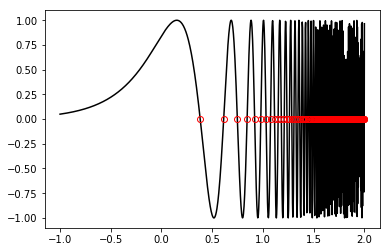

CPU times: user 281 ms, sys: 27.8 ms, total: 309 ms
Wall time: 164 ms


(128, array([0.38157704+0.j, 1.23655975+0.j, 1.20987885+0.j, 1.18087505+0.j,
        1.14910499+0.j, 1.11398482+0.j, 1.07472381+0.j, 1.03021334+0.j,
        0.97882979+0.j, 0.91805593+0.j, 0.84367475+0.j, 0.74778072+0.j,
        0.61262569+0.j, 1.61943397+0.j, 1.61120303+0.j, 1.60276382+0.j,
        1.5941052 +0.j, 1.58521634+0.j, 1.57608286+0.j, 1.56669214+0.j,
        1.55703   +0.j, 1.54707961+0.j, 1.53682249+0.j, 1.52623911+0.j,
        1.51530862+0.j, 1.50400801+0.j, 1.49231139+0.j, 1.48018937+0.j,
        1.4676092 +0.j, 1.45453503+0.j, 1.44092752+0.j, 1.42674156+0.j,
        1.41192432+0.j, 1.39641715+0.j, 1.38015427+0.j, 1.36305611+0.j,
        1.34503406+0.j, 1.32598107+0.j, 1.30577283+0.j, 1.2842601 +0.j,
        1.26126242+0.j, 1.81172983+0.j, 1.80713196+0.j, 1.80246968+0.j,
        1.797742  +0.j, 1.79294511+0.j, 1.78807926+0.j, 1.78314132+0.j,
        1.77812816+0.j, 1.77303845+0.j, 1.76787054+0.j, 1.76262171+0.j,
        1.75728877+0.j, 1.7518686 +0.j, 1.74635836+0.j, 1.7

In [65]:
#define the function and search interval
f = lambda x : np.sin(np.exp(3*x))

a = -1
b = 2

#solve and time
%time zeros = yr.solve(f, a, b, plot=True)
zeros.size, zeros

## Polynomials

When a function in a system is a multivariate polynomial, it may be useful to pass it in as a YRoots's `Polynomial` object, since `Polynomial`s have a special `evaluate_grid` method which allows for faster Chebyshev-approximations. 

If the system only includes polynomials, it may be preferable to use alternative methods which do not rely on Chebyshev approximations, depending on the degree and dimension of the system. We demonstrate how to create Polynomial objects and how to access methods specific to solving polynomial systems. These methods may be faster than `yr.solve` for lower degree polynomial systems.

In [ ]:
#import tools specific to polynomial functions
from numalgsolve.polynomial import MultiPower, MultiCheb
from numalgsolve import polyroots as pr

The two types of `Polynomial` objects are `MultiPower` and `MultiCheb`, corresponding to polynomials in the power basis and Chebyshev basis. 
Polynomials in $n$-dimensions are represented by an $n$-dimensional tensor of coefficients, where the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficient of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ would be initialized as 
```python
f = MultiPower(np.array([[1, 0, 2],
                         [0, 0, 4],
                         [3, 0, 0],
                         [5, 0, 0]]))```

Polynomials can also be initialized from a string representation, but that's kinda complicated.

In [ ]:
string rep

The function `pr.solve` has many options for polynomial rootfinding, but the default parameters are the most robust. The syntax is similar to `yr.solve`.

In [ ]:
#TODO CHANGE PR SYNTAX
pr.solve

In [228]:
#making logo
def one(x,y):
    return y-np.abs(np.sin(50*x)/10+1.6*x)
def two(x,y):
    return y-.5*np.log(np.abs(10*x))

In [244]:
yr.solve([one,two],-np.ones(2),np.ones(2),plot=True,plot_intervals=True)

Interval -  [0.52747267 0.77031882] [0.77031882 1.        ]
Interval -  [0.7129431  0.09567889] [0.77031882 0.15982049]


KeyError: (13.0, 2.0)

(-1.0, 1.0, -1.0, 1.0)

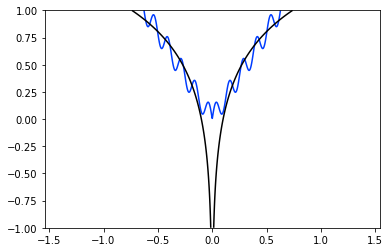

In [235]:
funcs = [one,two]
dim=2
#print the contours
contour_colors = ['#003cff','k'] #royal blue and black
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
for i in range(dim):
    plt.contour(X,Y,funcs[i](X,Y),levels=[0],colors=contour_colors[i])
plt.axis([-1,1,-1,1])
plt.axis('equal')